In [114]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
pd.pandas.set_option('display.max_columns',None)
from pandas_profiling import ProfileReport
import re

In [115]:
train_df=pd.read_csv(r"D:\Users\abhisv\Desktop\train.csv")
test_df=pd.read_csv(r"D:\Users\abhisv\Desktop\test.csv")

In [116]:
(train_df.shape,test_df.shape)

((550068, 12), (233599, 11))

In [117]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [118]:
#train_df['Age']=train_df['Age'].map(lambda x:x.lstrip('+'))
#train_df['Age']=train_df['Age'].map(lambda x:x.rstrip('+'))

In [119]:
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].map(lambda x:x.lstrip('+'))
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].map(lambda x:x.rstrip('+'))

In [120]:
train_df['Stay_In_Current_City_Years']=pd.to_numeric(train_df['Stay_In_Current_City_Years'])

In [121]:
train_df.drop(['User_ID','Product_ID','Age'],axis=1,inplace=True)

In [122]:
def null_valuetreat(train_df):
    null_value_table=train_df.isna().sum()/train_df.shape[0]*100
    print('Total columns are:',null_value_table)
    retained_column=null_value_table[null_value_table<int(input())].index
    print('The retained_columns are:',retained_column)
    drop_column=null_value_table[null_value_table>int(input())].index
    print('The columns to be dropped are:',drop_column)
    numerical=[i for i in train_df if train_df[i].dtypes!='O']
    print('The numerical columns are:',numerical)
    cat=[i for i in train_df if train_df[i].dtypes=='O']
    print('The categorical are:',cat)
    #Lets check the discrete and continous variables in numerical
    discrete=[i for i in train_df.columns if len(train_df[i].unique())<25]
    print('The discrete number of columns are:',len(discrete))
    continous=[i for i in train_df.columns if len(train_df[i].unique())>25]
    print('The continous number of columns are:',len(continous))
    print('continous columns:',continous)
    return train_df,cat,numerical,discrete,continous

In [ ]:
train_df,cat,numerical,discrete,continous=null_valuetreat(train_df)

In [72]:
#As we see from above code, the null value percentage for product_category_2 and 3 are more than 30 percent, so lets drop them from analysis.

In [73]:
train_df.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [74]:
train_df.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,10,A,2,0,3,8370
1,F,10,A,2,0,1,15200
2,F,10,A,2,0,12,1422
3,F,10,A,2,0,12,1057
4,M,16,C,4,0,8,7969


In [75]:
#Lets find the relation between discrete variables and Purchase

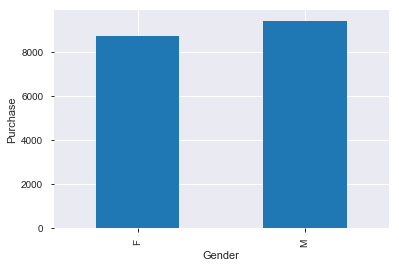

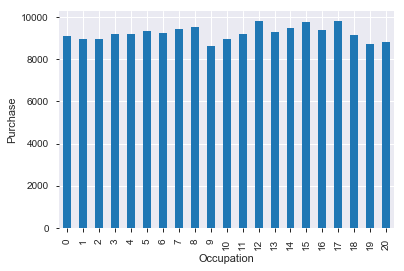

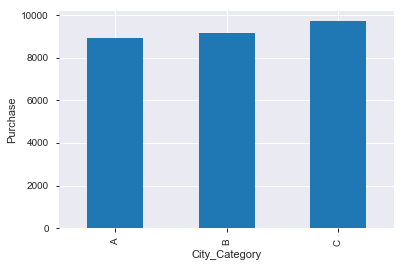

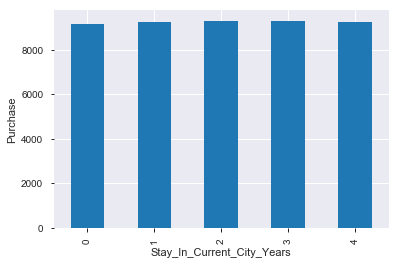

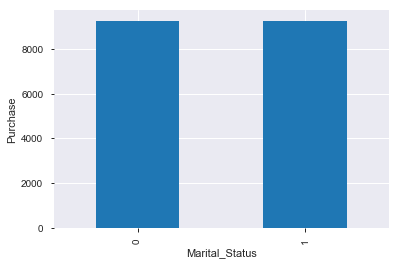

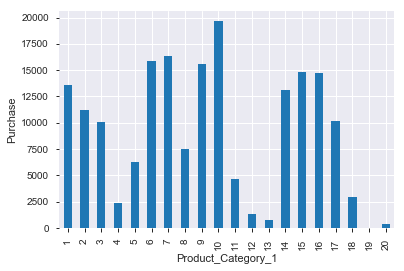

KeyError: 'Product_Category_2'

In [76]:
for feature in discrete:
    data=train_df.copy()
    data.groupby(feature)['Purchase'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Purchase')
    plt.show()

Text(0.5, 1.0, 'Purchase amount distribution')

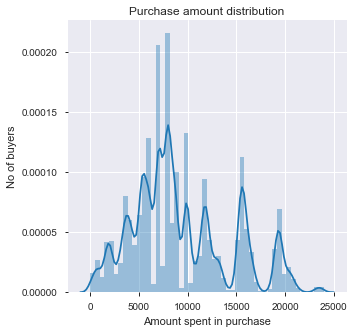

In [77]:
plt.figure(figsize=(5,5))
sns.distplot(train_df['Purchase'],bins=50)
plt.xlabel('Amount spent in purchase')
plt.ylabel('No of buyers')
plt.title('Purchase amount distribution')

In [78]:
#It almost have gaussian distribution
print('Skew is:',train_df.Purchase.skew())
print('kurtosis is:',train_df.Purchase.kurt())

Skew is: 0.6001400037087128
kurtosis is: -0.3383775655851702


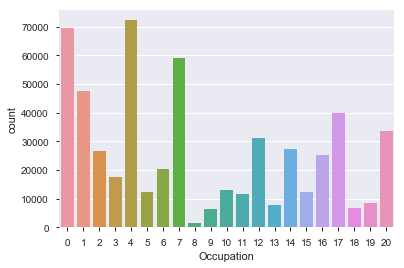

In [79]:
sns.countplot(train_df['Occupation'])

In [80]:
#Lets do some encoding
gender_dict={'M':0,'F':1}
train_df['Gender']=train_df['Gender'].apply(lambda x:gender_dict[x])
train_df['Gender'].value_counts()

0    414259
1    135809
Name: Gender, dtype: int64

In [81]:
city_dict = {'A':0, 'B':1, 'C':2}
train_df['City_Category'] = train_df['City_Category'].apply(lambda line: city_dict[line])
train_df['City_Category'].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [82]:
train_df=pd.get_dummies(train_df,columns=['Stay_In_Current_City_Years'])

In [83]:
train_df.head(2)

,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1,10,0,0,3,8370,0,0,1,0,0
1,1,10,0,0,1,15200,0,0,1,0,0


In [84]:
y=train_df[['Purchase']]

In [90]:
x=train_df

In [92]:
x.head()

,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1,10,0,0,3,0,0,1,0,0
1,1,10,0,0,1,0,0,1,0,0
2,1,10,0,0,12,0,0,1,0,0
3,1,10,0,0,12,0,0,1,0,0
4,0,16,2,0,8,0,0,0,0,1


In [93]:
train_df.shape[0]

550068

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [101]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((385047, 10), (385047, 1), (165021, 10), (165021, 1))

In [102]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [104]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [110]:
score=r2_score(y_test,y_pred)
score

0.12455603163460582

In [112]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_test=dtr.predict(x_test)

In [113]:
score=r2_score(y_test,y_pred)
score

0.1876150306205424